# PyTorch ReLU vs Sigmoid Activation Functions

### Objective: Test Sigmoid and Relu activation functions on the MNIST dataset and chart the results. 
>
1. Define Several Neural Networks, Criterion functions, and Optimizers.  
2. Test Sigmoid and Rectified Linear Unit (ReLU).  
3. Analyze Results.  

## Table of Contents

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Train">Define Several Neural Network, Criterion function, Optimizer</a></li>
    <li><a href="#Test">Test Sigmoid and Relu </a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>

We'll need the following libraries


In [1]:
!pip3 install torch torchvision torchaudio

In [2]:
# Import the libraries

# PyTorch Library
import torch
# PyTorch Neural Network
import torch.nn as nn
# To transform tensors
import torchvision.transforms as transforms
# To download datasets
import torchvision.datasets as dsets
# For activation functions
import torch.nn.functional as F

# Used to graph data and loss curves
import matplotlib.pylab as plt
# Nummpy for data manipulation
import numpy as np
# Setting the seed will allows control over randomness and gives reproducibility
torch.manual_seed(2)

<!--Empty Space for separating topics-->


<h2 id="Model">Neural Network Module and Training Function</h2> 


Define the neural network module or class, with two hidden Layers 


In [3]:
# Create the model class using Sigmoid as the activation function

class Net(nn.Module):

    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        # D_in is the input size of the first layer (size of input layer)
        # H1 is the output size of the first layer and input size of the second layer (size of first hidden layer)
        # H2 is the outpout size of the second layer and the input size of the third layer (size of second hidden layer)
        # D_out is the output size of the third layer (size of output layer)
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)

    # Prediction
    def forward(self,x):
        # Puts x through the first layers then the sigmoid function
        x = torch.sigmoid(self.linear1(x))
        # Puts results of previous line through second layer then sigmoid function
        x = torch.sigmoid(self.linear2(x))
        # Puts result of previous line through third layer
        x = self.linear3(x)
        return x

Define the class for the Relu activation function 


In [4]:
# Create the model class using Relu as the activation function

class NetRelu(nn.Module):

    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        # D_in is the input size of the first layer (size of input layer)
        # H1 is the output size of the first layer and input size of the second layer (size of first hidden layer)
        # H2 is the outpout size of the second layer and the input size of the third layer (size of second hidden layer)
        # D_out is the output size of the third layer (size of output layer)
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)

    # Prediction
    def forward(self, x):
        # Puts x through the first layers then the relu function
        x = torch.relu(self.linear1(x))
        # Puts results of previous line through second layer then relu function
        x = torch.relu(self.linear2(x))
        # Puts result of previous line through third layer
        x = self.linear3(x)
        return x

Define a function to  train the model, in this case, the function returns a Python dictionary to store the training loss and accuracy on the validation data 


In [5]:
# Model Training Function

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}
    # Number of times we train on the entire training dataset
    for epoch in range(epochs):
        # For each batch in the train loader
        for i, (x, y) in enumerate(train_loader):
            # Resets the calculated gradient value, this must be done each time as it accumulates if we do not reset
            optimizer.zero_grad()
            # Makes a prediction on the image tensor by flattening it to a 1 by 28*28 tensor
            z = model(x.view(-1, 28 * 28))
            # Calculate the loss between the prediction and actual class
            loss = criterion(z, y)
            # Calculates the gradient value with respect to each weight and bias
            loss.backward()
            # Updates the weight and bias according to calculated gradient value
            optimizer.step()
            # Saves the loss
            useful_stuff['training_loss'].append(loss.data.item())

        # Counter to keep track of correct predictions
        correct = 0
        # For each batch in the validation dataset
        for x, y in validation_loader:
            # Make a prediction
            z = model(x.view(-1, 28 * 28))
            # Get the class that has the maximum value
            _, label = torch.max(z, 1)
            # Check if our prediction matches the actual class
            correct += (label == y).sum().item()

        # Saves the percent accuracy
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)

    return useful_stuff

<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Make Some Data</h2> 


Load the training dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>


In [6]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Load the testing dataset by setting the parameters <code>train</code> to <code>False</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>


In [7]:
# Create the validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Create the criterion function  


In [8]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Create the training-data loader and the validation-data loader object 


In [9]:
# Create the training data loader and validation data loader object

# Batch size is 2000 and shuffle=True means the data will be shuffled at every epoch
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
# Batch size is 5000 and the data will not be shuffled at every epoch
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

<!--Empty Space for separating topics-->


<h2 id="Train">Define Neural Network, Criterion function, Optimizer and Train the Model</h2> 


Create  the model with 100 hidden neurons  


In [10]:
# Set the parameters to create the model

input_dim = 28 * 28 # Dimension of an image
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10 # Number of classes

Start with 10 to start but can go up-to 35 but will take an hour to run. 

In [17]:
# Set the number of iterations

cust_epochs = 35

<!--Empty Space for separating topics-->


<h2 id="Test">Test Sigmoid and Relu</h2> 


Train the network using the Sigmoid activation function


In [18]:
learning_rate = 0.01
# Create an instance of the Net model
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
# Create an optimizer that updates model parameters using the learning rate and gradient
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# Train the model
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

Also train with the Relu activation function


In [19]:
learning_rate = 0.01
# Create an instance of the NetRelu model
modelRelu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
# Create an optimizer that updates model parameters using the learning rate and gradient
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
# Train the model
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

<!--Empty Space for separating topics-->


<h2 id="Result">Analyze Results</h2> 


Compare the training loss for each activation 


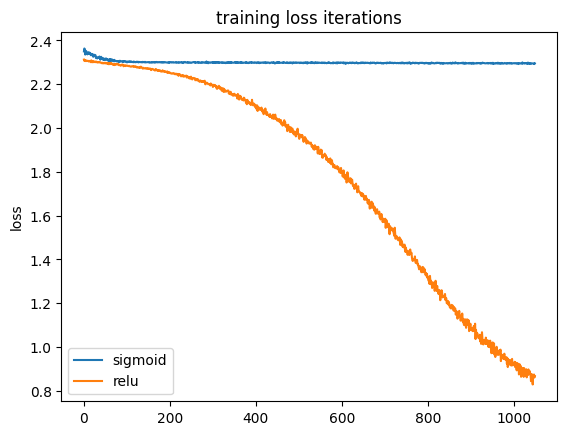

In [20]:
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

Compare the validation loss for each model  


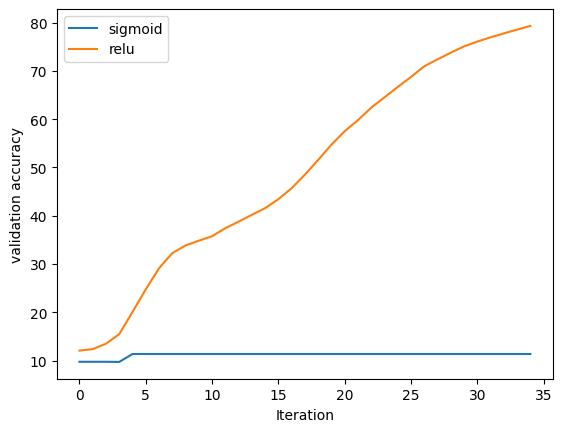

In [21]:
plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu')
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')
plt.legend()

<!--Empty Space for separating topics-->


## Summary

In this notebook, we tested the performance of Sigmoid and ReLU activation functions on the MNIST dataset using a neural network with two hidden layers. We trained the models and compared their training loss and validation accuracy over multiple epochs.

- **Training Loss / Validation Accuracy**: ReLU significantly outperformed Sigmoid with a faster decrease in training loss and a higher validation accuracy. 

### Key Takeaway Notes:

- ReLU is generally a good default choice for hidden layers in most neural network architectures.

#### When to Use Sigmoid Activation Function:
- **Binary Classification**: Sigmoid is commonly used in the output layer for binary classification problems as it outputs a probability value between 0 and 1.
- **Shallow Networks**: Suitable for shallow networks where the vanishing gradient problem is less prominent.
- **Probabilistic Interpretation**: When you need a probabilistic interpretation of the output.

#### When to Use ReLU Activation Function:
- **Deep Networks**: ReLU is preferred for deep networks as it helps mitigate the vanishing gradient problem, allowing for faster and more effective training.
- **Sparse Activation**: ReLU introduces sparsity in the network by outputting zero for negative input values, which can lead to more efficient computations.

### Libraries and Major Classes/Parameters Used:
- **PyTorch**: The primary library used for building and training neural networks.
    - `torch.nn`: Contains modules and classes for building neural networks.
    - `torch.optim`: Provides optimization algorithms like SGD.
    - `torchvision.datasets`: For loading datasets like MNIST.
    - `torchvision.transforms`: For transforming data into tensors.

### Business Applications: 
>
Understanding the strengths and appropriate use cases for different activation functions is key for businesses to build more effective and efficient models based on a specific business needs, ex:

- **Image Recognition**: The techniques demonstrated can be applied to various image recognition tasks, such as facial recognition, object detection, and medical image analysis.
- **Handwriting Recognition**: The MNIST dataset is a classic example of handwriting recognition and can be extended to other forms of document processing and digitization.
- **Predictive Analytics**: Neural networks with appropriate activation functions can be used for predictive analytics in finance, healthcare, and other industries to make data-driven decisions.

---
**Author:** William Ruffu  
**Date:** Jan 2025  
**License:** All Rights Reserved | Open Source License | Freely distributable  
© 2024 William Ruffu
